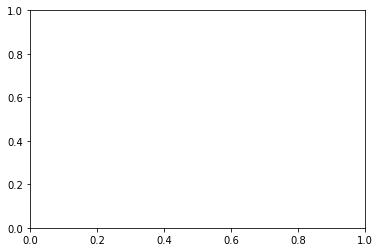

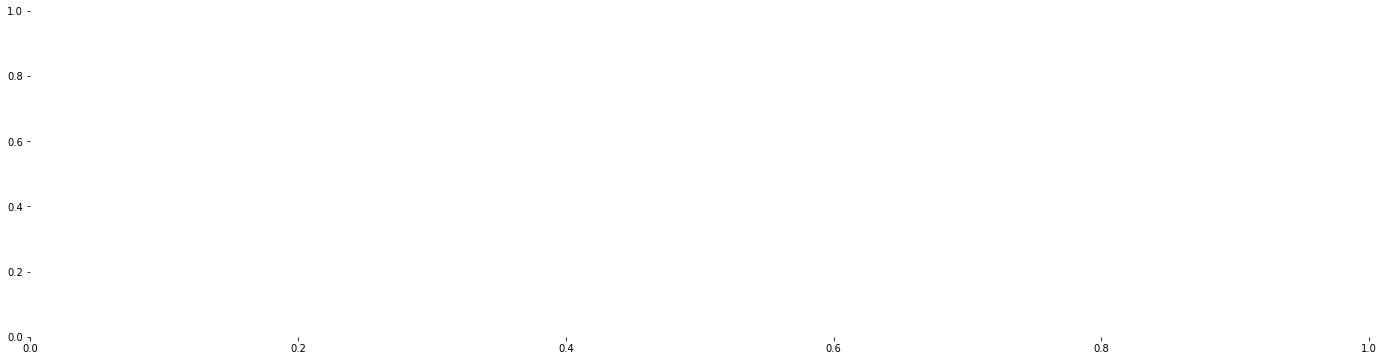

In [4]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import random
from collections import OrderedDict
from numpy import savetxt
from numpy import genfromtxt
from matplotlib.transforms import blended_transform_factory
from matplotlib.figure import Figure, figaspect
from matplotlib.lines import Line2D
import matplotlib.patches as mpatch
from scipy import interpolate
from pylab import figure, axes, pie, title, show
import csv
import pandas as pd

plt.cla()

# mise-en-page
x_off  = 0.4
y_off = 9.2
y_offset_2 = 0
y_off3 = -2.7
fig = plt.figure(figsize=(24, 6))
ax = plt.subplot(1, 1, 1)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# dictionaries
pitch_dict = { 40: -3.5+y_off, 41: -3+y_off, 42: -3+y_off, 43: -2.5+y_off, 44: -2.5+y_off, 45: -2+y_off, 46: -2+y_off, 47: -1.5+y_off, 48: -1+y_off,
               49: -1+y_off, 50: -0.5+y_off, 51: -0.5+y_off, 52: 0+y_off, 53: 0.5+y_off, 54: 0.5+y_off }
oct_dict = { 0: 0, 12: 3.5, 24: 7, 36: 10.5 }
pha_dict = { 1: x_off, 2: 1.235+x_off, 2.5: (1.235+0.6175)+x_off, 3: (1.235*2)+x_off, 4: (1.235*3)+x_off,
                5: (1.235*4)+x_off, 6: (1.235*5)+x_off, 7: (1.235*6)+x_off, 8: (1.235*7)+x_off }
pos_dict = { 'a': 1.0, 'b': 2.0, 'c': 3.0, 'd': 4.0, 'e': 5.0, 'f': 6.0, 'g': 7.0, 'h': 8.0, 'j': 9.0, 'k': 10.0, 'l': 11.0,
             'm': 12.0, 'n': 13.0, 'o': 14.0, 'p': 15.0, 'q': 16.0, 'r': 17.0, 's': 18.0, 't': 19.0 }

# fonts
font1 = {'family': 'Opus Special Std',
        'color':  'black',
        'weight': 'normal',
        'size': 22
        }

font2 = {'family': 'Opus Std',
        'color':  'black',
        'weight': 'normal',
        'size': 24
        }

font3 = {'family': 'Opus Special Std',
        'color':  'black',
        'weight': 'normal',
        'size': 25
        }

font4 = {'family': 'Opus Special Std',
        'color':  'black',
        'weight': 'normal',
        'size': 30
        }

font5 = {'family': 'Opus Std',
        'color':  'black',
        'weight': 'normal',
        'size': 18
        }

font6 = {'family': 'Times New Roman',
        'color':  'black',
        'weight': 'normal',
        'size': 14
        }

font7 = {'family': 'Opus Special Std',
        'color':  'black',
        'weight': 'normal',
        'size': 12
        }

font8 = {'family': 'Opus Special Std',
        'color':  'black',
        'weight': 'normal',
        'size': 14
        }

font9 = {'family': 'Opus Std',
        'color':  'black',
        'weight': 'normal',
        'size': 14
        }

font10 = {'family': 'Opus Special Std',
        'color':  'black',
        'weight': 'normal',
        'size': 20
        }

font11 = {'family': 'Opus Std',
        'color':  'black',
        'weight': 'normal',
        'size': 20
        }



chars:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 6, 5, 4, 3, 2, 1]
chars size:  16
pi_map [40.0, 42.0, 43.0, 45.0, 46.0, 48.0, 50.0, 51.0, 53.0, 51.0, 50.0, 48.0]


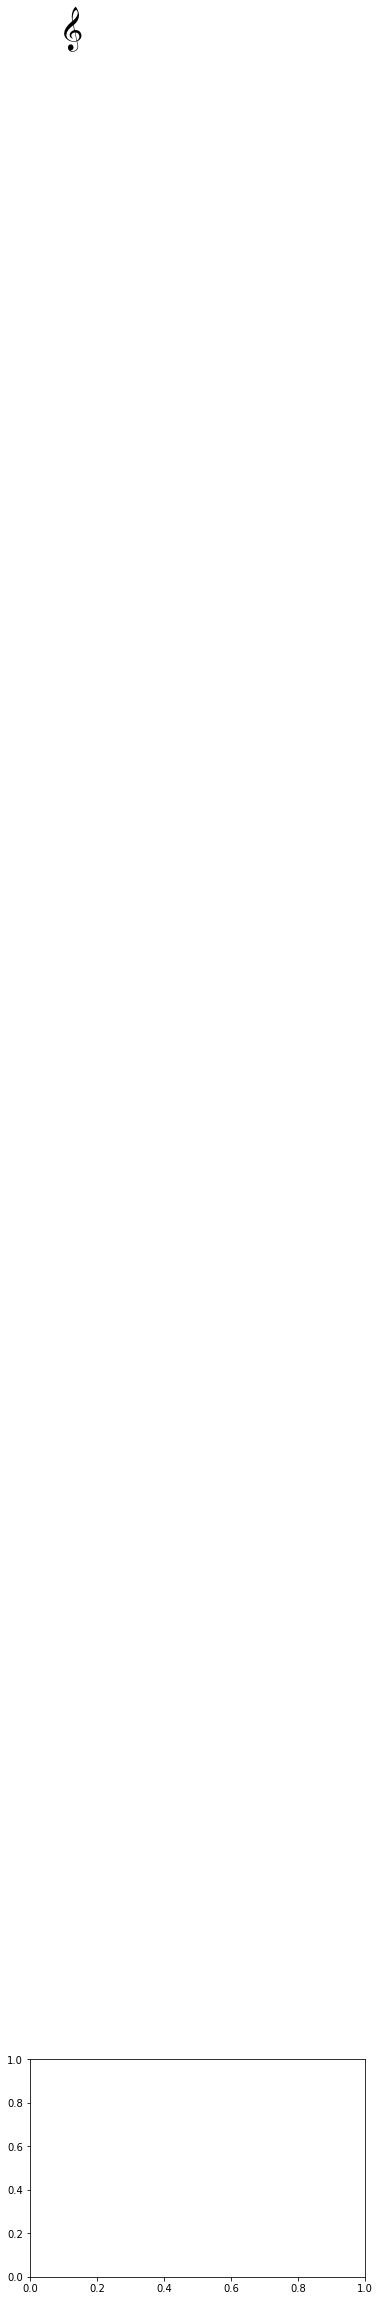

In [5]:
############DATA############
# arrays for data
chars = [ ]
x_moves = [ ]
y_moves = [ ]

x_pos = [ ]
y_pos = [ ]

#for other parameters
x_pos_1 = [ ]
y_pos_1 = [ ]
x_pos_2 = [ ]
y_pos_2 = [ ]
x_pos_3 = [ ]
y_pos_3 = [ ]

###################
#Read symbolic data
raw_data = pd.read_csv("pix.csv", converters={"0":int})
chars = raw_data["0"].values.tolist()
#size = len(chars)
size = 12

x_moves = chars
y_moves = chars
print("chars: ", chars)
print("chars size: ", len(chars))

#Parameter proximity
#moves_off_0 = random.randint(0, 40) # random offset for rhythm and pitch
moves_off_0 = 0 # take from the beginning

x_pos = x_moves[moves_off_0:]
y_pos = y_moves[moves_off_0:]
rhy_map  = [ ]
pi_map  = [ ]

#noteheads
notes = ['f' ]
cols = ['black']

pitches = [ ]
rhy_diff = [ ]
pit_diff = [ ]
octaves = [ ]
noteheads = [ ]
pitch_coll = [ ]
octave_coll = [ ]

###################
#MAPPING PARAMETERS
def paramMapping(pos, maptype, mini, maxi, rnd):
    for i in range(size):
        maptype.append(
            round((maxi-mini)*((pos[i] - min(pos)) / (max(pos) - min(pos)))+mini, rnd)
            )

#paramMapping(x_pos, rhy_map, 0.15, 1.85, 2) #RHYTHM MAPPING between 0.15 and 1.5
paramMapping(y_pos, pi_map, 40, 53, 0) #PITCH MAPPING between 40 and 53
##print("rhy_map", rhy_map)
print("pi_map", pi_map)

###################
#FIXED STUFF
#staff
X_1, Y_1 = np.linspace(0.06, 10.345, 10), np.zeros(10)

#measure lines
X_2, Y_2 = np.linspace(0, 0, 10), np.linspace(4, -38, 10)

#staff  plot
for i in range(len([0,1,2,3,4])):
    ax.plot(X_1, y_off+Y_1+i, linestyle='solid', linewidth=0.5, color='black')

#octaves
octs = 12 

#Staff_offset
offset = 1.2 + x_off

#Treble clef
plt.text(0.1, 1.1+y_off, '&', fontdict=font2)

###################
#ending points
#ritend = len(rhy_map)
ritend = len(pi_map)
pitend = len(pi_map)


In [3]:
#RHYTHM
#use temporal distance
rhy_diff = 0.5
rhythms = [offset]

for i in range(size):
    rhythms.append(offset+rhy_diff*(i+1))
    
#for i in range(size):
#    try:
#         rhythms.append(rhy_diff[i])
#    except IndexError:
#        break
print("rhythms: ", rhythms)
     
#factoring etc.
r_fac = 1
rhythms = [x*r_fac for x in rhythms]
#rhythms = [x+offset for x in rhythms] #add offset if needed

#PITCH
#use temporal distance
#pit_diff = pi_map[moves_off_0:(pitend-(pitend-(moves_off_0+size)))]
pit_diff = pi_map

print("pitch_diff: ", pit_diff)

for i in range(size):
    pitches.append(pit_diff[i]) #pitch list
    octaves.append(octs)
#Noteheads
    noteheads.append(random.choice(notes)) #noteheads  #DEAL WITH THIS
    # colors.append(random.choice(cols))

#Phantom rhythms
phantoms = [1, 2, 2.5, 3, 4, 5, 6, 7, 8]
phan = [pha_dict[x] for x in phantoms]

#assign pitches
pitch_coll = [pitch_dict[x] for x in pitches]
octave_coll = [oct_dict[x] for x in octaves]
#graces = [pitch_dict[x] for x in gr_pit]
print("pitch_coll: ", pitch_coll)


#Lower beams
#end = size - 1 #don't use  for manual.
#conn = [0] #for auto
conn = [ ] #for manual

#manually assign for this example
conn.append(range(size))
conn = sum(conn, [ ])

#ax.plot(np.linspace((rhythms[conn[0]])+0.075, (rhythms[conn[size-1]])+0.04, 10), np.linspace(-13.1-y_offset_2, -13.1-y_offset_2, 10), linestyle='solid', linewidth=4, color='black'),


rhythms:  [1.6, 2.1, 2.6, 3.1, 3.6, 4.1, 4.6, 5.1, 5.6, 6.1, 6.6, 7.1, 7.6]
pitch_diff:  [40.0, 42.0, 43.0, 45.0, 46.0, 48.0, 50.0, 51.0, 53.0, 51.0, 50.0, 48.0]
pitch_coll:  [5.699999999999999, 6.199999999999999, 6.699999999999999, 7.199999999999999, 7.199999999999999, 8.2, 8.7, 8.7, 9.7, 8.7, 8.7, 8.2]


TypeError: can only concatenate list (not "range") to list

In [ ]:
###################
######EVENTS######
for i in range(size):
   try:
      pitch = pitch_coll[i]
      rhythm = rhythms[i]
      oct_add = octave_coll[i]
      note_heads = noteheads[i]
      [
         plt.text(rhythm+0.026, pitch+oct_add, note_heads, fontdict=font3, color='black'), #note
         ax.plot(np.linspace(rhythm+0.06, rhythm+0.06, 10), np.linspace((pitch+oct_add)-0.4, -13.3-y_offset_2, 10),
         linestyle='solid', linewidth=0.5, color='black'),  #stem 
     # plt.text(rhythm+0.026, ((pitch+oct_add) - ledger_sub) - 2.95, ledger_up, fontdict=font3), #upper ledger line
     # plt.text(rhythm+0.026, ((pitch+oct_add) + ledger_add) + 2.1, ledger_down, fontdict=font3), #lower ledger line
         ]
   except IndexError:
      break

# oct_add = octa[i]

for i in range(2):
    ax.plot(np.linspace(phan[i]+0.06, phan[i]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(1):
    ax.plot(np.linspace(phan[i+2]+0.06, phan[i+2]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(2):
    ax.plot(np.linspace(phan[i+3]+0.06, phan[i+3]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(1):
    ax.plot(np.linspace(phan[i+5]+0.06, phan[i+5]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(1):
    ax.plot(np.linspace(phan[i+6]+0.06, phan[i+6]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems
for i in range(2):
    ax.plot(np.linspace(phan[i+7]+0.06, phan[i+7]+0.06, 10), np.linspace(4+y_off, 15+y_off, 10), linestyle='solid', linewidth=0.5, color='gray'),  #stems


for i in range(len(phan)):
    try:
        [
        ax.plot(np.linspace((phan[0])+0.075, (phan[4])+0.045, 10), np.linspace(15+y_off, 15+y_off, 10), linestyle='solid', linewidth=4, color='gray'), #1
        ax.plot(np.linspace((phan[1])+0.075, (phan[2])+0.045, 10), np.linspace(14+y_off, 14+y_off, 10), linestyle='solid', linewidth=4, color='gray'), #1
        ax.plot(np.linspace((phan[5])+0.075, (phan[8])+0.04, 10), np.linspace(15+y_off, 15+y_off, 10), linestyle='solid', linewidth=4, color='gray'), #2
        ]
    except IndexError:
        break

plt.yticks([]),
plt.xticks([])

###################
####set up the axes####
pit = plt.axes([0.03, 0.43, 0.96, 0.25])#axes([left, bottom, width, height])
ax.add_artist(pit) #did the trick

x0, x1, y0, y1 = pit.axis()
pit.axis((x0*9,
          x1*9,
          y0*2-1, 
          y1*2-1))

pit.set_zorder(-1)
pit.spines['top'].set_visible(False)
pit.spines['bottom'].set_visible(False)
pit.spines['left'].set_visible(False)
pit.spines['right'].set_visible(False)
plt.yticks([]),
plt.xticks([])


In [ ]:
#######################
####playing parameters####
# this is an inset axes over the main axes
par = plt.axes([0.03, 0.355, 0.96, 0.2])#axes([left, bottom, width, height])
ax.add_artist(par) #did the trick

#create the param lines
par.add_line(Line2D([-10, 1], [1.0, 1.0], transform=par.transAxes,
                  linestyle='-', linewidth=1.2, color='Red'))
par.add_line(Line2D([0, 1], [0.75, 0.75], transform=par.transAxes,
                  linestyle=':', linewidth=1, color='Black'))
par.add_line(Line2D([0, 1], [0.5, 0.5], transform=par.transAxes,
                  linestyle='--', linewidth=1, color='Black'))
par.add_line(Line2D([0, 1], [0.25, 0.25], transform=par.transAxes,
                  linestyle=':', linewidth=1, color='Black'))
par.add_line(Line2D([0, 1], [0.0, 0.0], transform=par.transAxes,
                  linestyle='-', linewidth=1.2, color='Red'))

x0, x1, y0, y1 = par.axis()
par.axis((x0*9,
          x1*9,
          y0*2-1, 
          y1*2-1))

moves_off_0 = random.randint(0, 50) #control how close they are

for i in range(size):
    x_pos_1.append(random.randint(1, 100))
    y_pos_1.append(random.randint(1, 100))
    x_pos_2.append(random.randint(1, 100))
    y_pos_2.append(random.randint(1, 100))
    x_pos_3.append(random.randint(1, 100))
    y_pos_3.append(random.randint(1, 100))

x_1  = [0]
y_1  = [ ]
x_2  = [0]
y_2  = [ ]
x_3  = [0]
y_3  = [ ]

#differences
for i in range(len(x_pos_1)):
    try:
        x_1.append(x_1[i]+x_pos_1[i+1])
    except IndexError:
        break
print("parameter: ", x_1)

#factor_1 = 29/max(x_1) #smaller dividend => compression on the x axis.
factor_1 = 12/max(x_1) #smaller dividend => compression on the x axis.

x_1 = np.multiply(x_1, factor_1)

for i in range(len(x_pos_2)):
    try:
        x_2.append(x_2[i]+x_pos_2[i+1])
    except IndexError:
        break
#factor_2 = 28/max(x_2)
factor_2 = 12/max(x_2) 

x_2 = np.multiply(x_2, factor_2)    

for i in range(len(x_pos_3)):
    try:
        x_3.append(x_3[i]+x_pos_3[i+1])
    except IndexError:
        break
#factor_3 = 30/max(x_3)
factor_3 = 12/max(x_3) 

x_3 = np.multiply(x_3, factor_3)

#normalize between 1 and -1
for i in range(len(y_pos_1)):
    y_1.append(
        round(2*((y_pos_1[i] - min(y_pos_1)) / (max(y_pos_1) - min(y_pos_1)))-1, 3)
        )
for i in range(len(y_pos_2)):
    y_2.append(
        round(2*((y_pos_2[i] - min(y_pos_2)) / (max(y_pos_2) - min(y_pos_2)))-1, 3)
        )
for i in range(len(y_pos_3)):
    y_3.append(
        round(2*((y_pos_3[i] - min(y_pos_3)) / (max(y_pos_3) - min(y_pos_3)))-1, 3)
        )

#PAC_2   
param_x_1 = np.array(x_1)
param_y_1 = np.array(y_1)
param_x_2 = np.array(x_2)
param_y_2 = np.array(y_2)
param_x_3 = np.array(x_3)
param_y_3 = np.array(y_3)

#PAC_3 #dynamics control
divi = 2.65
##divi = 2.65
low_lim = 21.7 #more = down
##low_lim = 25.7
factor_y_1 = divi/max(y_1) #dividend = upper limit
param_y_1 = np.multiply(param_y_1, factor_y_1)-low_lim #-21.7 -->lower limit 
factor_y_2 = divi/max(y_2) #dividend = upper limit
param_y_2 = np.multiply(param_y_2, factor_y_2)-low_lim 
factor_y_3 = divi/max(y_3) #dividend = upper limit
param_y_3 = np.multiply(param_y_3, factor_y_3)-low_lim 

#1
f_1 = interpolate.PchipInterpolator(param_x_1, param_y_1, 0)
f_2 = interpolate.PchipInterpolator(param_x_2, param_y_2, 0)
f_3 = interpolate.PchipInterpolator(param_x_3, param_y_3, 0)

##singles   TO ADD PARAMETERS TO THE SINGLE LINES
xnew1_1 = np.arange((rhythms[conn[0]]+0.075), (rhythms[conn[1]]+0.04), 0.001)

#PAC_4
#ALWAYS KEEP ONE PARAMETER
xnew1_1 = np.arange((rhythms[conn[0]]+0.075), (rhythms[conn[1]]+0.04), 0.001)  
ynew1_1 = f_1(xnew1_1)
xnew2_1 = np.arange((rhythms[conn[0]]+0.075), (rhythms[conn[1]]+0.04), 0.001)  
ynew2_1 = f_2(xnew2_1)
xnew3_1 = np.arange((rhythms[conn[0]]+0.075), (rhythms[conn[1]]+0.04), 0.001)  
ynew3_1 = f_3(xnew3_1)

ax.plot(xnew1_1, ynew1_1, '-', color='Red', alpha = 0)
ax.plot(xnew2_1, ynew2_1, '-', color='Blue', alpha = 0)
ax.plot(xnew3_1, ynew3_1, '-', color='Green', alpha = 0)

############################
####set up the axes for params####
par.set_zorder(-1)
par.spines['top'].set_visible(False)
par.spines['bottom'].set_visible(False)
par.spines['left'].set_visible(False)
par.spines['right'].set_visible(False)

plt.yticks([])
plt.xticks([])

#global y-limits
ax.set_ylim(-35, 29) 

fig.set_tight_layout(True)
plt.yticks([])
plt.xticks([])

plt.show()
